In [1]:
# prepare_data_for_eda.py scrip, without saving out to pkl or csv
import os
import pandas as pd
import logging.config
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler #for matplotlib colors
import seaborn as sns
from sklearn import preprocessing

import importlib
import missingno as msno


LOGGING_CONFIG = os.getenv('LOGGING_CONFIG')
logging.config.fileConfig(LOGGING_CONFIG)
logger = logging.getLogger('prepare_data_for_eda')

In [2]:
DATADIR = os.getenv('DATADIR')
logger.info("using DATADIR {}".format(DATADIR))

2018-05-30 12:13:31,006 - prepare_data_for_eda - INFO - using DATADIR ../DATA


In [3]:
content_performance = pd.read_csv(os.path.join(DATADIR, 'content_performance.csv.gz'),  compression='gzip')

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Individual distributions

#### Content versions (could be multiple versions of a page) with survey responses

In [4]:
content_performance.content_id.nunique()

428739

In [5]:
content_performance.id.nunique()

446850

### Histograms

In [6]:
ga_vars = content_performance[['pageviews', 
                  'unique_pageviews', 
                  'feedex_comments', 
                  'is_this_useful_yes',
                               'is_this_useful_no',
                  'number_of_internal_searches','exits', 'entrances', 'bounce_rate', 
                  'count_survey_responses',
                  'response_per_pageview', 
                  'response_per_unique_pageview',
                  'useful_per_responses', 
                  'total_to_unique_pageviews',
                               'feedex_per_unique_1000'
                 ]].replace([np.inf, -np.inf], np.nan)
spell_grammar_vars = content_performance[[
                  'readability_score', 
                  'contractions_count', 
                  'equality_count',
                  'indefinite_article_count', 
                  'passive_count', 
                  'profanities_count',
                  'redundant_acronyms_count', 
                  'repeated_words_count', 
                  'simplify_count',
                  'spell_count',  
                 ]].replace([np.inf, -np.inf], np.nan)
content_vars = content_performance[[ 
                  'number_of_pdfs', 
                  'number_of_word_files',
                  'string_length', 
                  'sentence_count', 
                  'word_count'
                 ]].replace([np.inf, -np.inf], np.nan)

all_content_vars = content_performance[[ 'pageviews', 
                                        'unique_pageviews', 
                                        'feedex_comments',
                                        'is_this_useful_yes', 
                                        'is_this_useful_no',
                                        'number_of_internal_searches', 'exits', 'entrances', 'bounce_rate', 
                                        'number_of_pdfs', 
                                        'document_type', 
                                        'content_purpose_document_supertype',
                                        'first_published_at', 
                                        'public_updated_at', 
                                        'number_of_word_files',
                                        'status',                                          
                                        'string_length', 
                                        'sentence_count', 
                                        'word_count',
                                        'primary_organisation_content_id',
                                        'locale',
                                        'publishing_api_payload_version', 
                                        'count_survey_responses',
                                        'response_per_pageview', 
                                        'response_per_unique_pageview',
                                        'useful_per_responses', 
                                        'total_to_unique_pageviews',
                                        'feedex_per_unique_1000', 
                                        'searches_per_pageview_1000',
                                        'contractions_count_scaled', 
                                        'indefinite_article_count_scaled',
                                        'redundant_acronyms_count_scaled', 
                                        'repeated_words_count_scaled',
                                        'spell_count_scaled', 
                                        'readability_score_scaled',
                                        'equality_count_scaled', 
                                        'passive_count_scaled',
                                        'simplify_count_scaled', 
                                        'profanities_count_scaled', 
                                        'spelling_grammar',
                                        'style', 
                                        'errors'
                                       ]].replace([np.inf, -np.inf], np.nan)

composite_vars = content_performance[['spelling_grammar',
                                        'style', 
                                        'errors'
                                       ]].replace([np.inf, -np.inf], np.nan)

### proportion zero

In [7]:
unscaled_content_vars = content_performance[[ 'pageviews', 
                                        'unique_pageviews', 
                                        'feedex_comments',
                                        'is_this_useful_yes', 
                                        'is_this_useful_no',
                                        'number_of_internal_searches','exits', 'entrances', 'bounce_rate', 
                                        'number_of_pdfs',                                 
                                        'number_of_word_files',                                        
                                        'string_length', 
                                        'sentence_count', 
                                        'word_count',
                                        'count_survey_responses',
                                        'response_per_pageview', 
                                        'response_per_unique_pageview',
                                        'useful_per_responses', 
                                        'total_to_unique_pageviews',
                                        'feedex_per_unique_1000', 
                                        'searches_per_pageview_1000',
                                        'contractions_count', 
                                        'indefinite_article_count',
                                        'redundant_acronyms_count', 
                                        'repeated_words_count',
                                        'spell_count', 
                                        'readability_score',
                                        'equality_count', 
                                        'passive_count',
                                        'simplify_count', 
                                        'profanities_count', 
                                        'spelling_grammar',
                                        'style', 
                                        'errors'
                                       ]].replace([np.inf, -np.inf], np.nan)

In [8]:
percent_zero = unscaled_content_vars[unscaled_content_vars == 0].count(axis=0)/len(unscaled_content_vars.index)*100

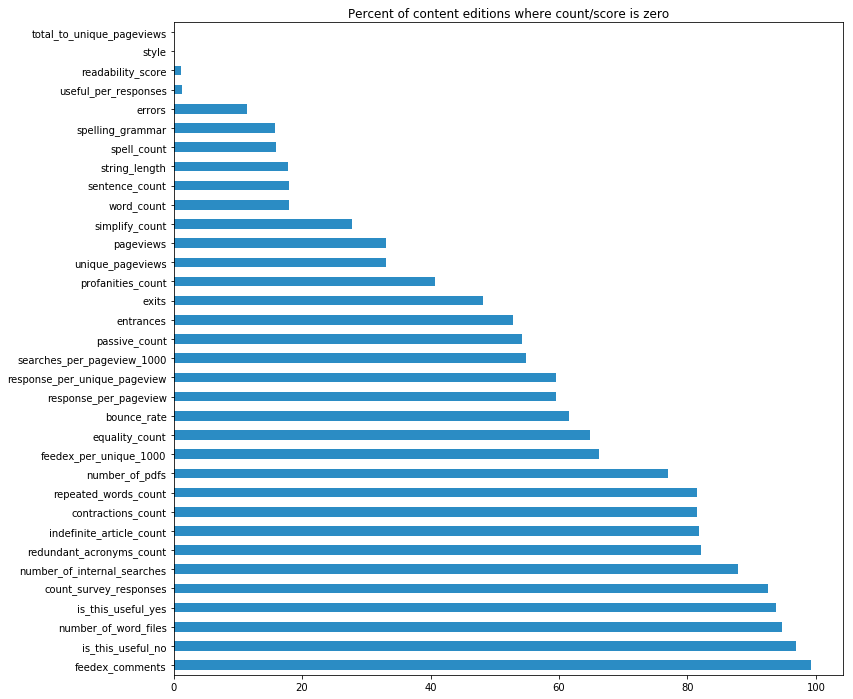

In [9]:
percent_zero.sort_values(ascending=False).plot(kind = 'barh', figsize=(12, 12), color='#2B8CC4', title='Percent of content editions where count/score is zero')

In [10]:
ga_vars.describe()

,pageviews,unique_pageviews,feedex_comments,is_this_useful_yes,is_this_useful_no,number_of_internal_searches,exits,entrances,bounce_rate,count_survey_responses,response_per_pageview,response_per_unique_pageview,useful_per_responses,total_to_unique_pageviews,feedex_per_unique_1000
count,4.468500e+05,4.468500e+05,446850.000000,446850.000000,446850.000000,4.468500e+05,4.468500e+05,4.468500e+05,446850.000000,446850.000000,299340.000000,299340.000000,33579.000000,299340.000000,299340.000000
mean,8.007410e+02,5.620664e+02,0.413752,0.594025,0.491838,1.004462e+01,2.225770e+02,2.336057e+02,6.056993,1.085863,0.006789,0.008037,0.717001,1.262529,0.185964
std,3.948670e+04,2.857576e+04,163.359843,34.601771,27.628809,2.949882e+03,1.071904e+04,9.550655e+03,13.216775,56.547435,0.056594,0.064241,0.386921,0.377779,11.608385
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000
50%,3.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.185452,0.000000
75%,2.200000e+01,1.700000e+01,0.000000,0.000000,0.000000,0.000000e+00,6.000000e+00,4.000000e+00,4.651163,0.000000,0.000000,0.000000,1.000000,1.367816,0.000000
max,1.164198e+07,8.552308e+06,108022.000000,13895.000000,9654.000000,1.725798e+06,3.238626e+06,2.532019e+06,100.000000,18023.000000,1.600000,2.000000,1.000000,55.611465,3000.000000


In [11]:
ga_vars.pageviews.describe()

count    4.468500e+05
mean     8.007410e+02
std      3.948670e+04
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      2.200000e+01
max      1.164198e+07
Name: pageviews, dtype: float64

In [12]:
np.log(18)

2.8903717578961645

In [13]:
np.exp(15)

3269017.3724721107

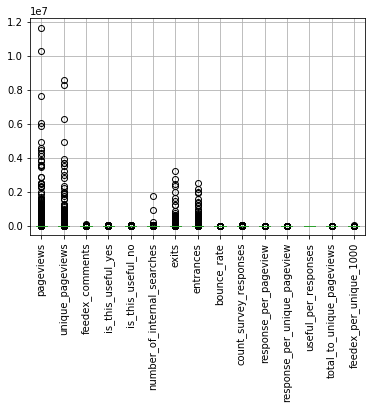

In [14]:
ga_vars.boxplot(rot=90)

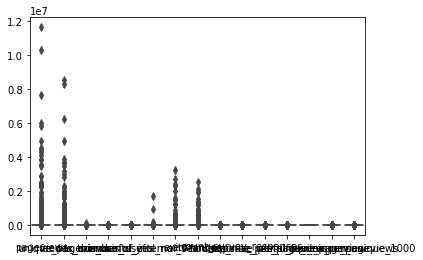

In [15]:
sns.boxplot(data=ga_vars)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122d8bac8>,
      dtype=object)

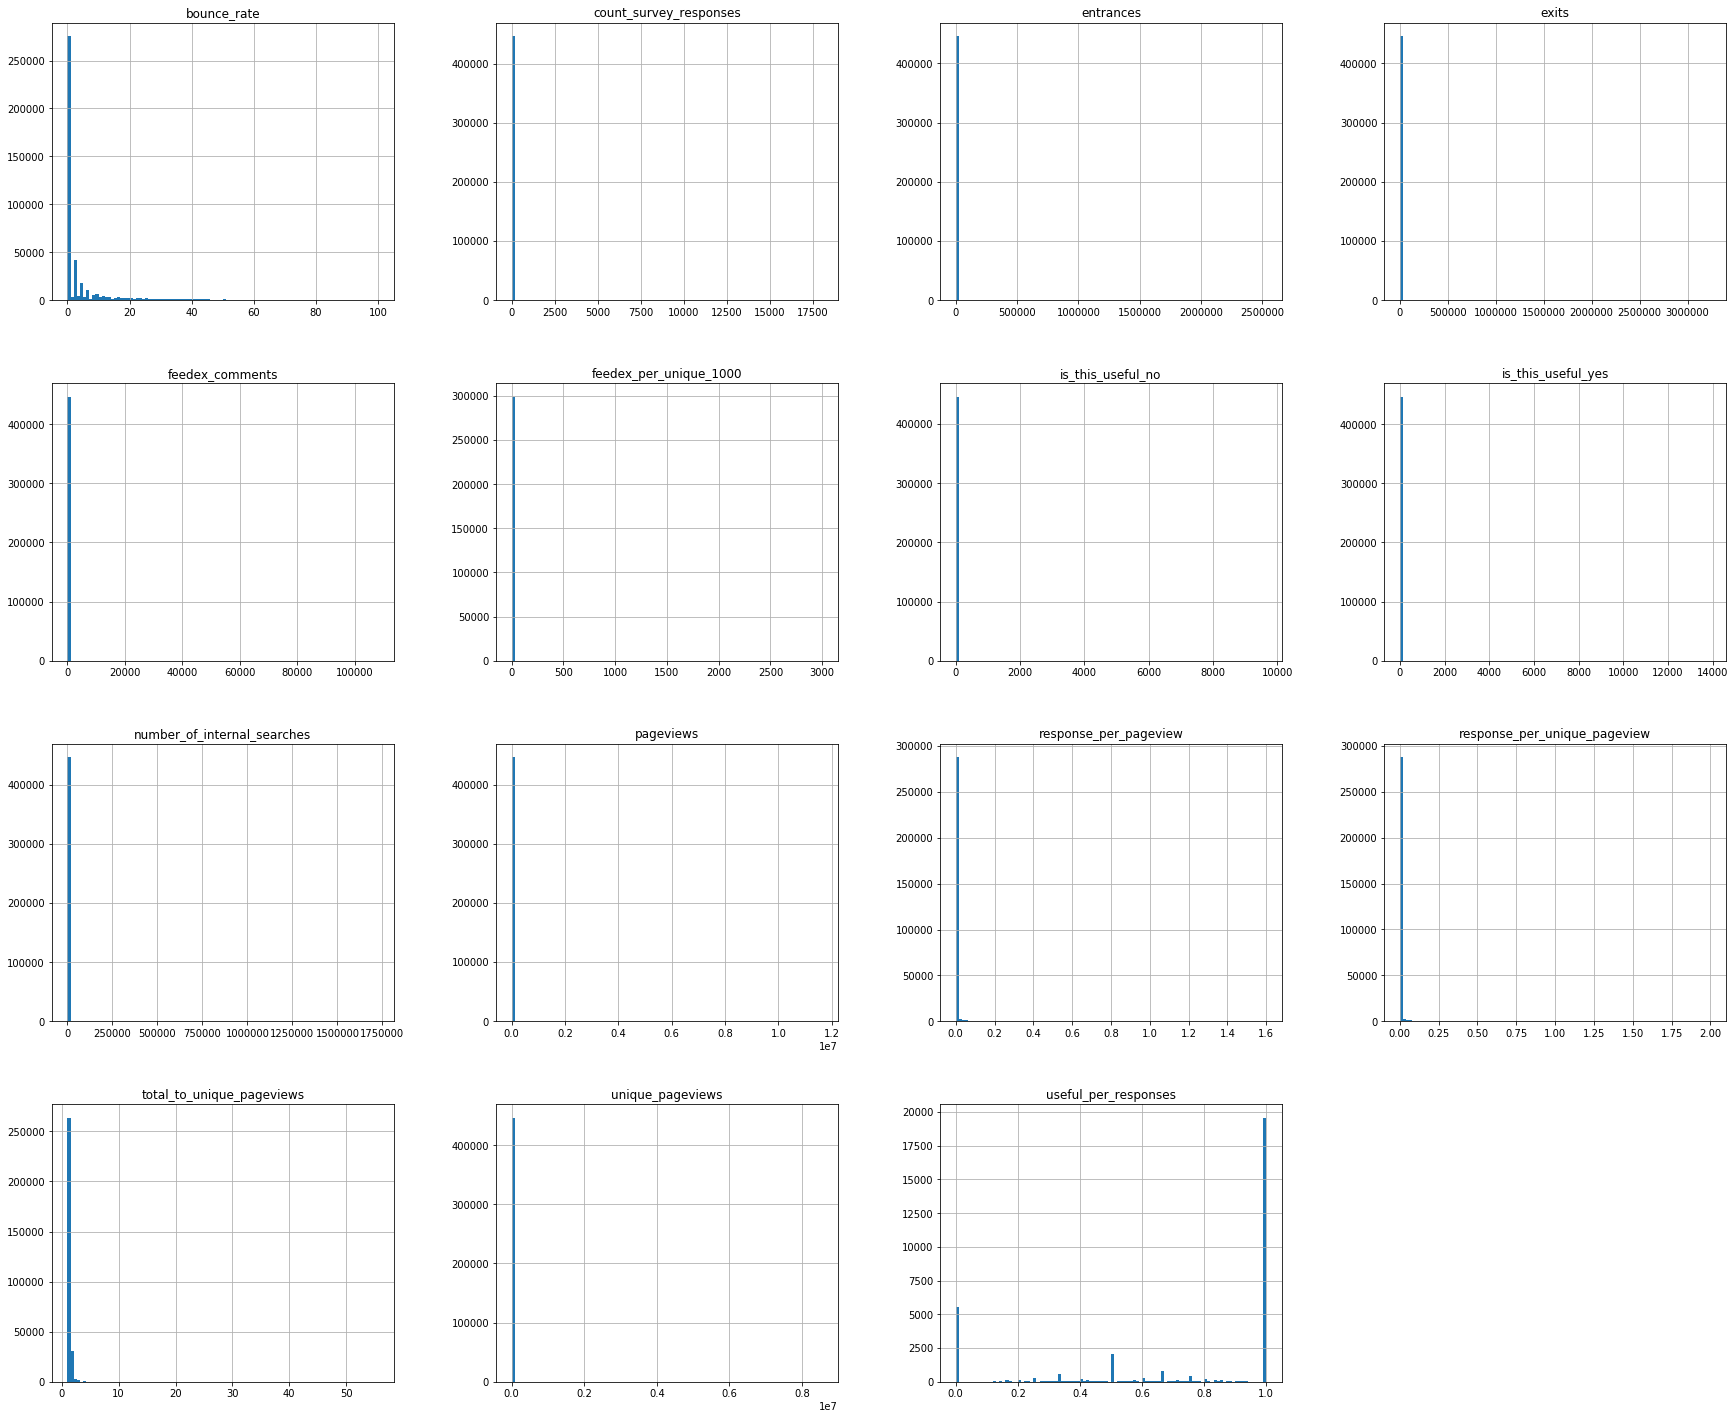

In [16]:
ga_vars.hist(bins=100, figsize=(30, 25))

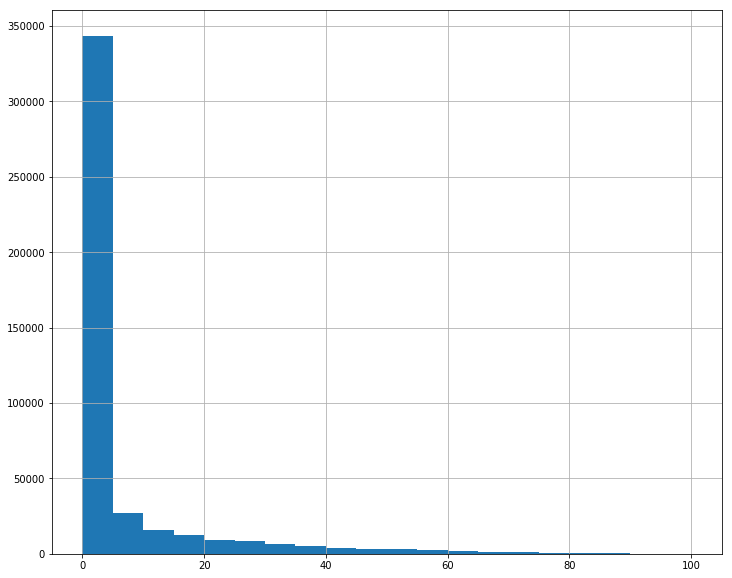

In [17]:
ga_vars['bounce_rate'].hist(bins=20, figsize=(12, 10))

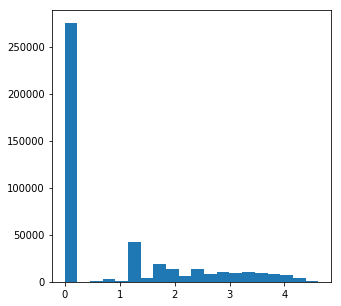

In [18]:
np.log(ga_vars['bounce_rate']+1).hist(bins=20, figsize=(5, 5), grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124484ef0>,
      dtype=object)

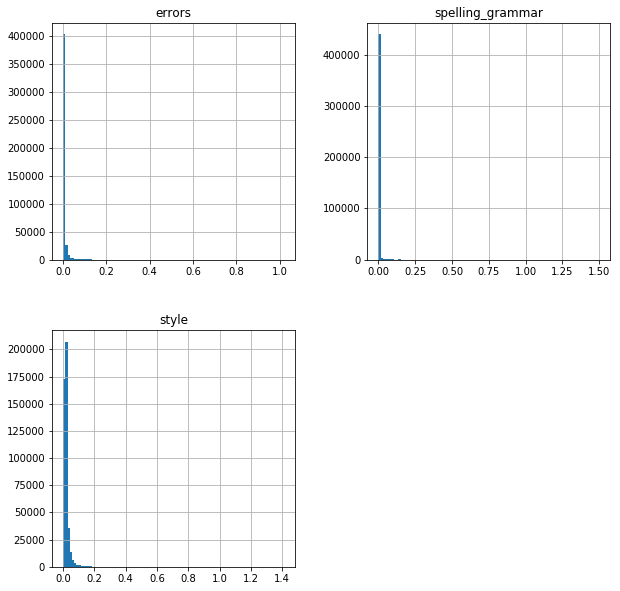

In [19]:
composite_vars.hist(bins=100, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122fa97f0>,
      dtype=object)

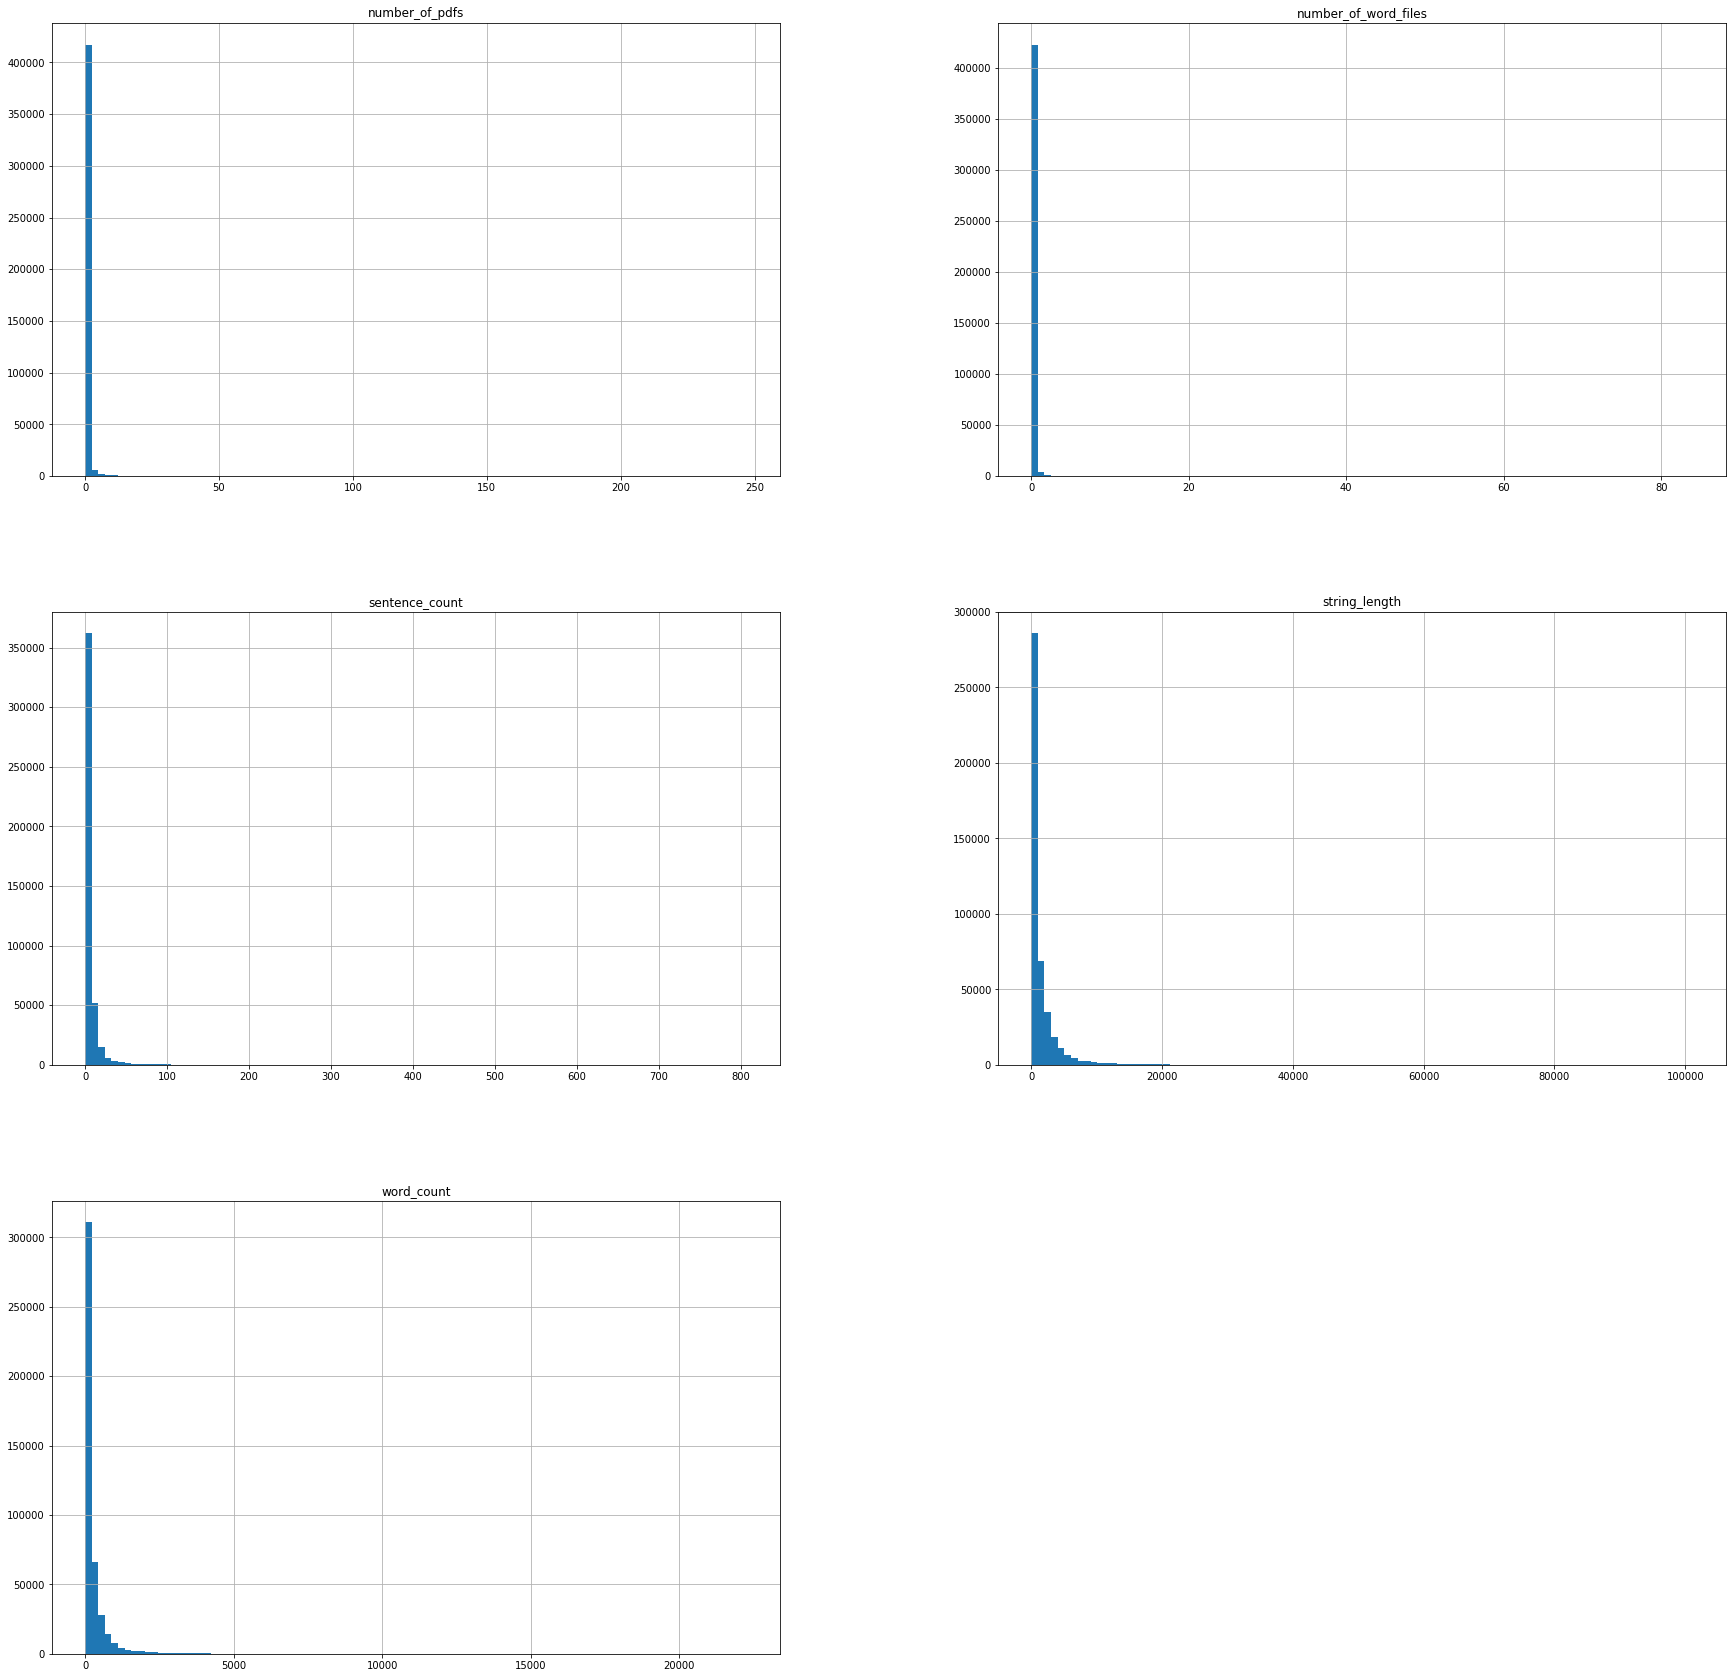

In [20]:
content_vars.hist(bins=100, figsize=(30, 30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ab0b2e8>,
      dtype=object)

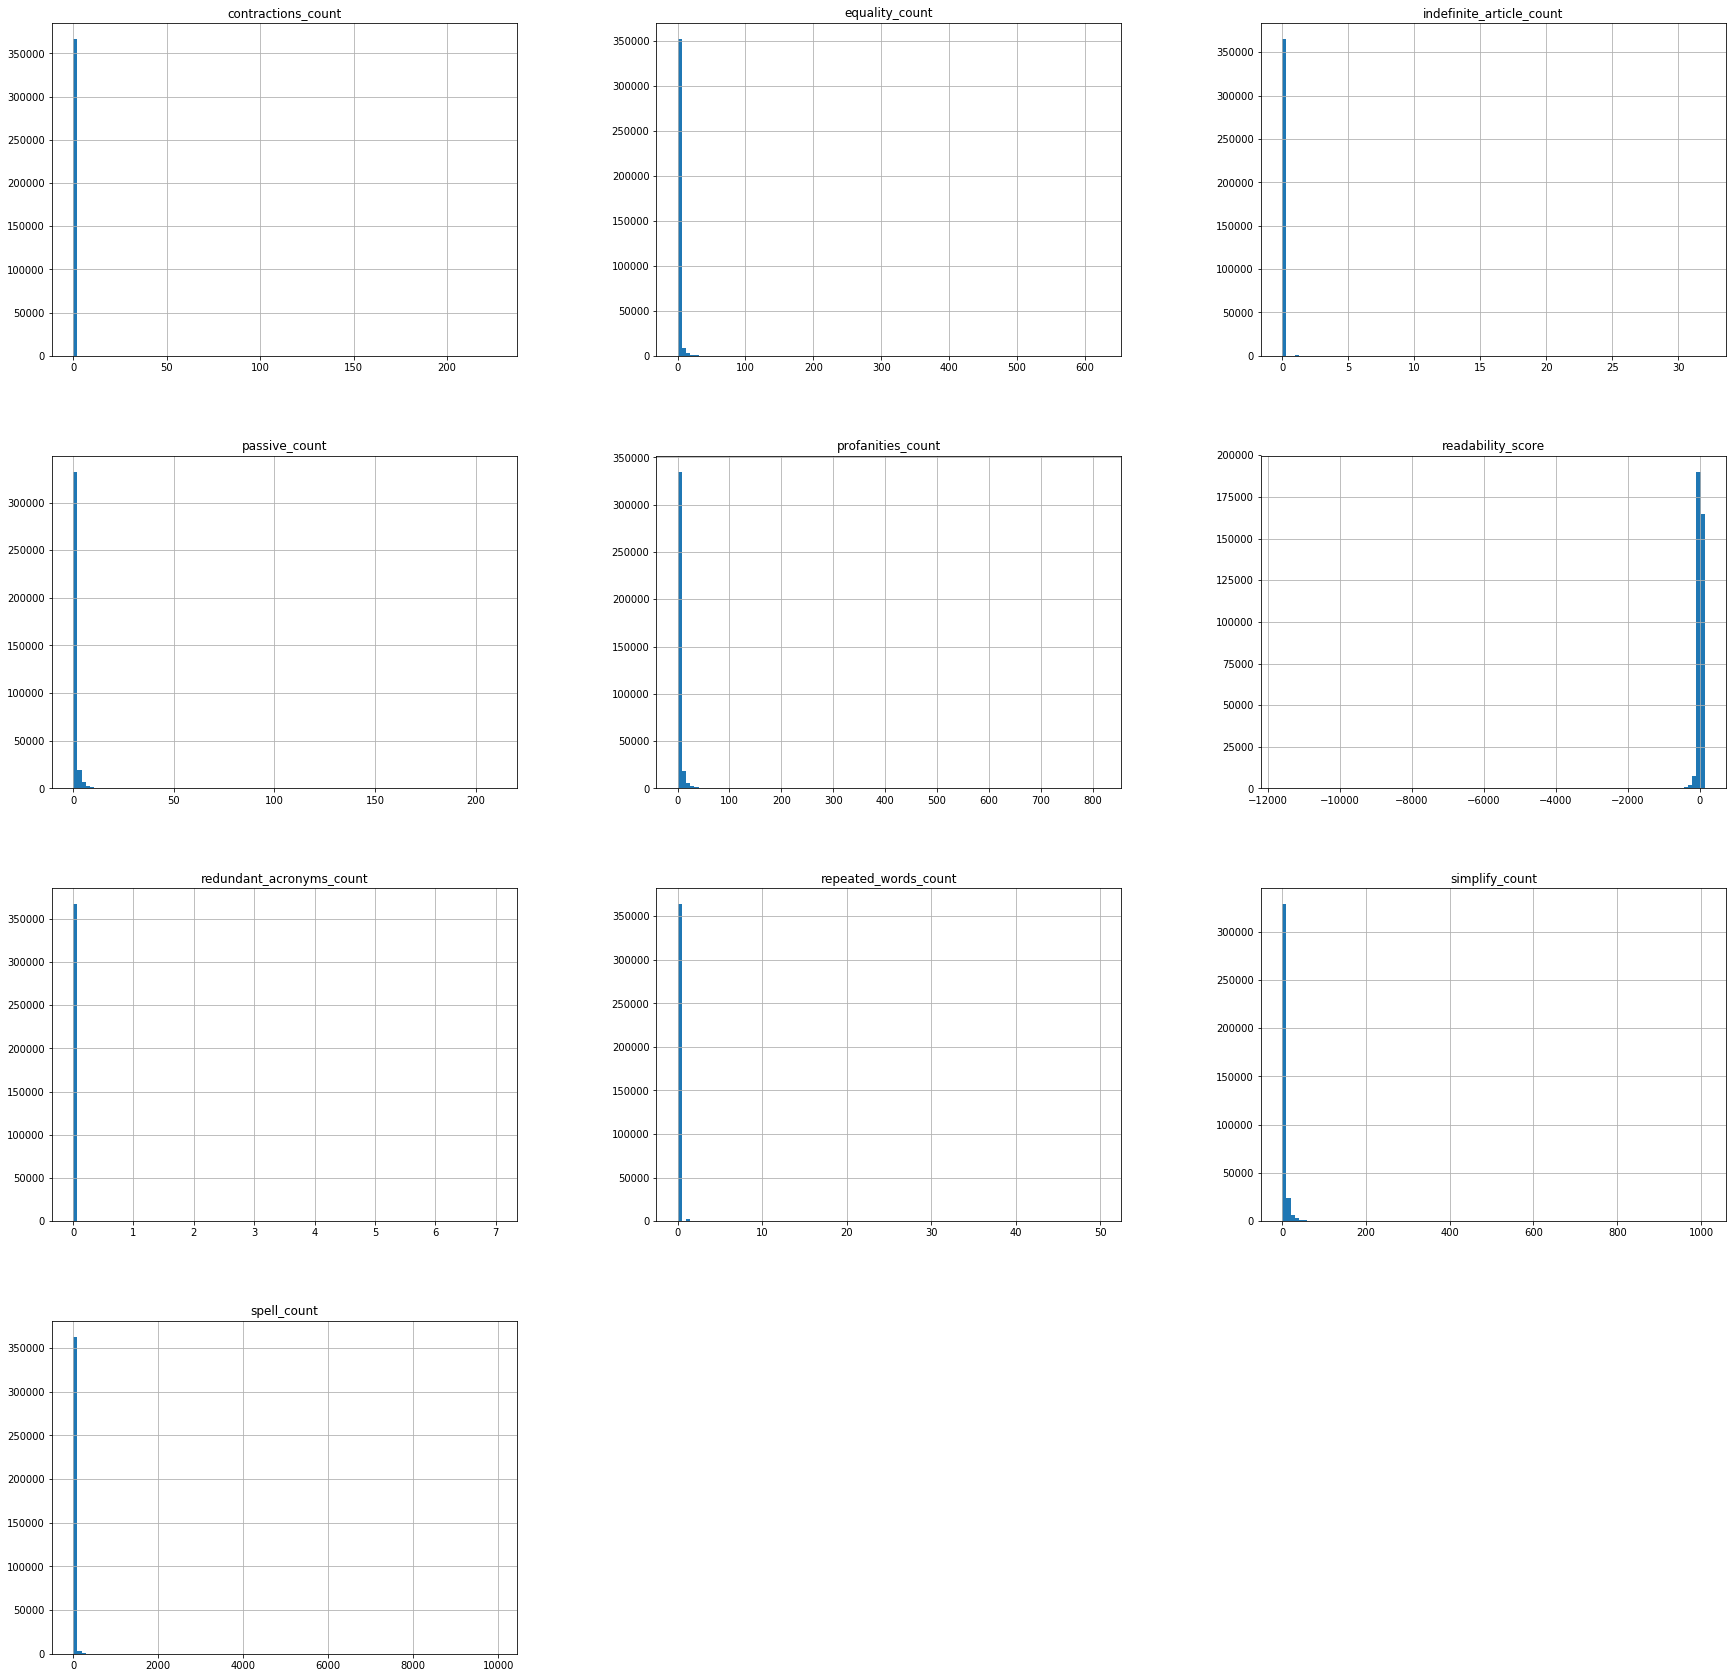

In [21]:
spell_grammar_vars.hist(bins=100, figsize=(30, 30))

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000., 14000000.]),
 <a list of 9 Text xticklabel objects>)

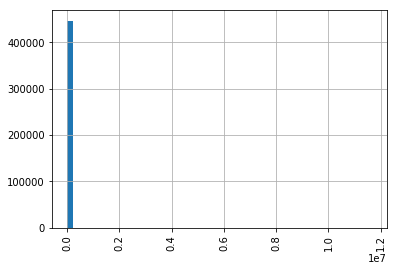

In [22]:
ga_vars['pageviews'].hist(bins=50)
plt.xticks(rotation=90)

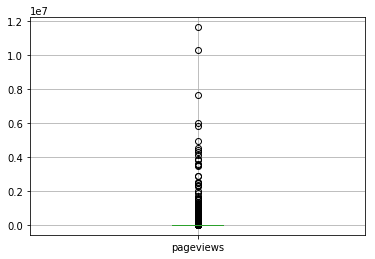

In [23]:
ga_vars.boxplot(column='pageviews', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

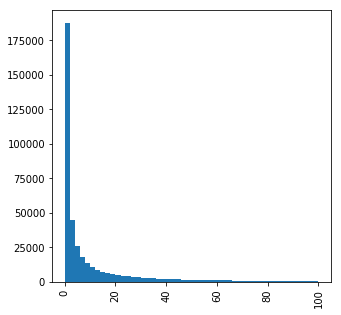

In [24]:
ga_vars['pageviews'].hist(bins=50, range=(0, 100), grid=False, figsize=(5, 5))
plt.xticks(rotation=90)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text xticklabel objects>)

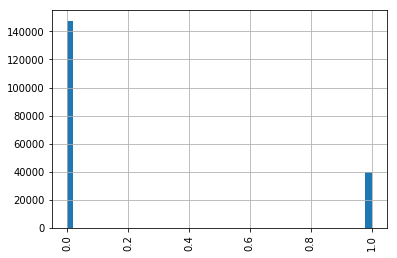

In [25]:
ga_vars['pageviews'].hist(bins=50, range=(0, 1))
plt.xticks(rotation=90)

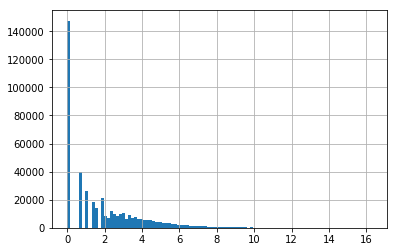

In [26]:
log_transformed = (ga_vars['pageviews']+1).apply(np.log)

log_transformed.hist(bins=100)

In [27]:
np.log(1)

0.0

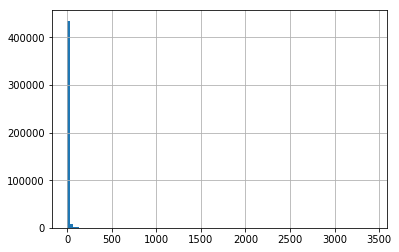

In [28]:

sqrt_transformed = ga_vars['pageviews'].apply(np.sqrt) # Get the square root of data points*

sqrt_transformed.hist(     # Plot histogram
                 bins=100)

In [29]:
#    'status',  'document_type', 'content_purpose_document_supertype',
#        'first_published_at', 'public_updated_at', 'primary_organisation_title', 
#                   'locale',

In [30]:
content_performance[content_performance['count_survey_responses']>0].shape

(33579, 64)

In [31]:
content_performance[content_performance['count_survey_responses']==0].shape

(413271, 64)

In [32]:
content_performance[content_performance['count_survey_responses']>0].shape[0] + content_performance[content_performance['count_survey_responses']==0].shape[0]

446850

In [33]:
content_performance[content_performance['count_survey_responses'].isnull()].shape[0] + \
content_performance[content_performance['count_survey_responses']>0].shape[0] + \
content_performance[content_performance['count_survey_responses']==0].shape[0]

446850

In [34]:
print("{} out of {} ({}%) versions of pages have at least 1 survey response".format(
    content_performance[content_performance['count_survey_responses']>0].shape[0], 
    content_performance.id.nunique(), 
    content_performance[content_performance['count_survey_responses']>0].shape[0]/ 
    content_performance.id.nunique()*100
                                                                                   ))

33579 out of 446850 (7.51460221550856%) versions of pages have at least 1 survey response


In [35]:
content_performance.string_length.describe()

count    446848.000000
mean       1584.715686
std        3862.927341
min           0.000000
25%          91.000000
50%         479.000000
75%        1671.000000
max      101170.000000
Name: string_length, dtype: float64

#### string length

In [36]:
content_performance.string_length.describe()

count    446848.000000
mean       1584.715686
std        3862.927341
min           0.000000
25%          91.000000
50%         479.000000
75%        1671.000000
max      101170.000000
Name: string_length, dtype: float64

In [37]:
print('{} out of {} content items ({}%) have a recorded string_length of 0'.format(
    content_performance[content_performance['string_length']==0].shape[0], 
    content_performance.content_id.nunique(),
    round(content_performance[content_performance['string_length']==0].shape[0]/content_performance.content_id.nunique()*100, 2)))

79610 out of 428739 content items (18.57%) have a recorded string_length of 0


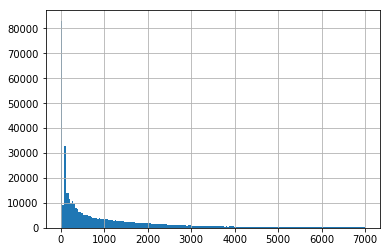

In [38]:
content_performance.string_length.hist(bins='auto', range=(0, 7000))

#### readability score
"Check readability"?!

In [39]:
content_performance.readability_score.describe()

count    366564.000000
mean         14.481152
std         119.518684
min      -11595.000000
25%           7.000000
50%          26.000000
75%          43.000000
max         147.000000
Name: readability_score, dtype: float64

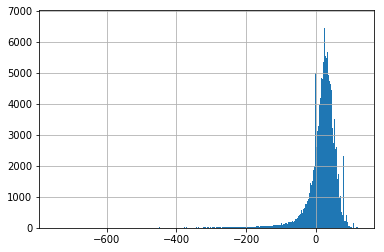

In [40]:
content_performance.readability_score.hist(bins='auto', range=(-750, 124))

#### Number of pdfs

In [41]:
content_performance.number_of_pdfs.describe()

count    428310.000000
mean          0.404527
std           2.507620
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         247.000000
Name: number_of_pdfs, dtype: float64

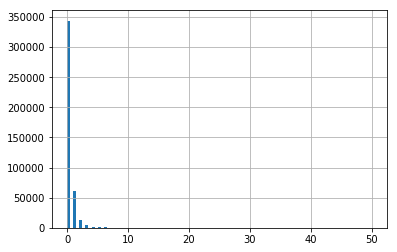

In [42]:
content_performance.number_of_pdfs.hist(bins=100, range=(0, 50))

#### Number of word files

In [43]:
content_performance.number_of_word_files.describe()

count    428310.000000
mean          0.020686
std           0.388864
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          84.000000
Name: number_of_word_files, dtype: float64

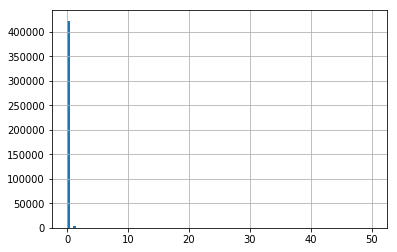

In [44]:
content_performance.number_of_word_files.hist(bins=100, range=(0, 50))

#### Composte vars

In [45]:
content_performance.spelling_grammar.describe()

count    446850.000000
mean          0.001841
std           0.009834
min           0.000000
25%           0.000101
50%           0.000603
75%           0.001872
max           1.500000
Name: spelling_grammar, dtype: float64

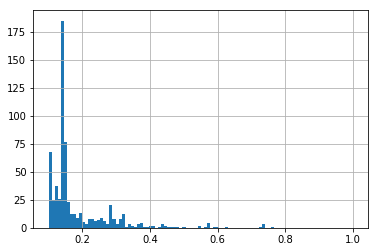

In [46]:
content_performance.spelling_grammar.hist(bins=100, range=(0.1, 1))

In [47]:
content_performance[['style']].describe()

,style
count,446850.000000
mean,0.022147
std,0.028557
min,0.000000
25%,0.011328
50%,0.017614
75%,0.022300
max,1.408788


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x140f945f8>]],
      dtype=object)

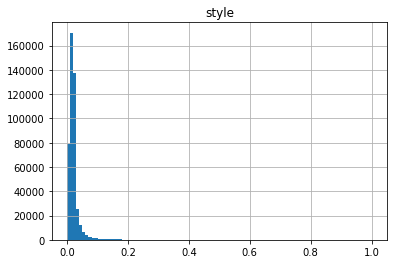

In [48]:
content_performance[['style']].hist(bins=100, range=(0, 1))

In [49]:
content_performance.errors.describe()

count    446850.000000
mean          0.004823
std           0.011775
min           0.000000
25%           0.000302
50%           0.002333
75%           0.004877
max           1.018403
Name: errors, dtype: float64

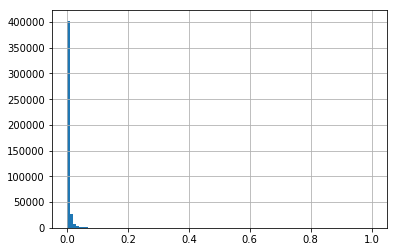

In [50]:
content_performance.errors.hist(bins=100, range=(0, 1))